In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.genmod import families

In [4]:
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use('seaborn-notebook')

In [5]:
df_old = pd.read_csv('../Datasets/DATA_3.02_HR2.csv')
df = pd.read_csv('../Datasets/DATA_4.02_HR3.csv')

In [6]:
df.head()

,S,LPE,NP,ANH,TIC,Newborn
0,0.86,0.69,4,105,4,1
1,0.52,0.98,4,209,2,0
2,0.84,0.60,5,207,2,0
3,0.60,0.65,3,143,2,1
4,0.85,0.57,3,227,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S        1000 non-null   float64
 1   LPE      1000 non-null   float64
 2   NP       1000 non-null   int64  
 3   ANH      1000 non-null   int64  
 4   TIC      1000 non-null   int64  
 5   Newborn  1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [8]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S        12000 non-null  float64
 1   LPE      12000 non-null  float64
 2   NP       12000 non-null  int64  
 3   ANH      12000 non-null  int64  
 4   TIC      12000 non-null  int64  
 5   Newborn  12000 non-null  int64  
 6   left     12000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 656.4 KB


In [9]:
df.describe()

,S,LPE,NP,ANH,TIC,Newborn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.662640,0.719340,3.781000,200.166000,3.10300,0.197000
std,0.224228,0.164401,0.985906,46.054831,1.04474,0.397931
min,0.120000,0.360000,2.000000,96.000000,2.00000,0.000000
25%,0.530000,0.590000,3.000000,160.000000,2.00000,0.000000
50%,0.680000,0.720000,4.000000,201.000000,3.00000,0.000000
75%,0.850000,0.860000,4.000000,241.000000,4.00000,0.000000
max,1.000000,1.000000,6.000000,287.000000,6.00000,1.000000


In [10]:
# Estimate a linear regression model of Rating 
# as a function of everything else
all_columns = "+".join(df_old.columns).replace('+left', '')
my_formula = 'left~' + all_columns

In [11]:
# Estimate the drivers of attrition
logreg = smf.glm(my_formula, family=families.Binomial(link=families.links.logit()), 
                 data=df_old).fit()

In [12]:
# Make predictions on the ou-of-sample data
probaToLeave = logreg.predict(df)

In [21]:
predattrition = pd.DataFrame(probaToLeave, columns=['probaToLeave'])

In [22]:
predattrition.head()

,probaToLeave
0,0.014420
1,0.105292
2,0.019466
3,0.018214
4,0.039977


In [23]:
# Add a column to the predattrition dataframe containing the performance
predattrition['performance'] = df['LPE']

Text(0.32, 0.445, 'Up or Out')

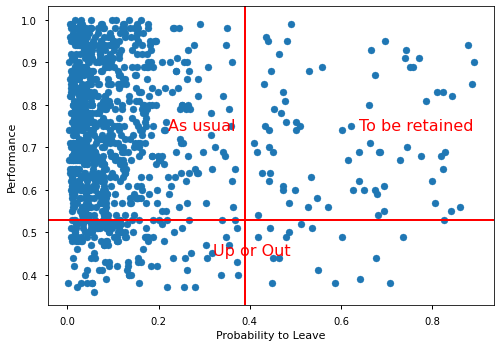

In [59]:
plt.scatter(predattrition['probaToLeave'], 
            predattrition['performance'])
plt.ylabel('Performance')
plt.xlabel('Probability to Leave')
plt.axvline(x=0.39,linewidth=2, color='r')
plt.axhline(y=0.53, linewidth=2, color='r')
plt.text(0.22, 0.74, "As usual", fontsize=16, color='r')
plt.text(0.64, 0.74, "To be retained", fontsize=16, color='r')
plt.text(.32, 0.445, "Up or Out", fontsize=16, color='r');

In [28]:
predattrition['priority'] = predattrition['performance'] * predattrition['probaToLeave']
predattrition.head()

,probaToLeave,performance,priority
0,0.014420,0.69,0.009950
1,0.105292,0.98,0.103186
2,0.019466,0.60,0.011680
3,0.018214,0.65,0.011839
4,0.039977,0.57,0.022787


In [31]:
orderpredattrition = predattrition.sort_values(by='priority', ascending=False)
orderpredattrition.head(10)

,probaToLeave,performance,priority
927,0.878494,0.94,0.825785
587,0.891633,0.90,0.802470
476,0.888296,0.85,0.755051
683,0.771582,0.91,0.702140
234,0.843231,0.82,0.691449
731,0.742426,0.93,0.690456
302,0.824101,0.83,0.684004
623,0.759118,0.89,0.675615
470,0.740667,0.91,0.674007
304,0.811398,0.83,0.673460


Now we see that the employee with the highest priority is ranked first, so based on our resources now we'll be able to decide which employees we want to target our efforts on in this order